# **SETI EDA**

### **Import dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import random

### **Dataset directory**

In [134]:
dirpath = 'artifacts\\data_ingestion\\seti-sub\\seti_signals_sub'

### **Find number of classes and class labels**

In [127]:
classes = []
train_classes = os.listdir('artifacts\\data_ingestion\\seti-sub\\seti_signals_sub\\train')
valid_classes = os.listdir('artifacts\\data_ingestion\\seti-sub\\seti_signals_sub\\test')
test_classes = os.listdir('artifacts\\data_ingestion\\seti-sub\\seti_signals_sub\\test')

if train_classes == valid_classes and train_classes == test_classes:
    classes = sorted(train_classes)
else:
    print("Class folder are not proper in the datasets")

In [128]:
classes

['brightpixel',
 'narrowband',
 'narrowbanddrd',
 'noise',
 'squarepulsednarrowband',
 'squiggle',
 'squigglesquarepulsednarrowband']

In [129]:
no_of_classes = len(classes)
no_of_classes

7

we have a total of 7 classes namely 'brightpixel', 'narrowband', 'narrowbanddrd', 'noise', 'squarepulsednarrowband', 'squiggle', 'squigglesquarepulsednarrowband'

### **Count files and check for dataset imbalances**

In [130]:
def count_files(dirpath):
    datasets = ['train', 'valid', 'test']
    class_counts = {}

    for dataset in datasets:
        dataset_path = os.path.join(dirpath, dataset)
        for class_folder in os.listdir(dataset_path):
            class_path = os.path.join(dataset_path, class_folder)
            file_count = len(os.listdir(class_path))
            if class_folder not in class_counts:
                class_counts[class_folder] = {dataset: file_count}
            else:
                class_counts[class_folder][dataset] = file_count

    df = pd.DataFrame.from_dict(class_counts, orient='index')
    df.index.name = 'Class'
    df = df.reset_index()

    return df

In [135]:
df_class_counts = count_files(dirpath)
print(df_class_counts)

                            Class  train  valid  test
0                      narrowband    800    100   100
1                           noise    800    100   100
2                     brightpixel    800    100   100
3          squarepulsednarrowband    800    100   100
4                   narrowbanddrd    800    100   100
5                        squiggle    800    100   100
6  squigglesquarepulsednarrowband    800    100   100


From above we cound see that we have equal number of images across classes in train, valid and test datasets. So, there is no imbalance in the dataset and the proportion of files are 80%, 10% and 10% respectively with a total of 7000 images. The dataset looks clean but we'll have to check for dimensions of images to conclude it.

### **Image Dimensions**

In [137]:
def get_unique_image_dimensions(dirpath):
    unique_dims = set()

    for dataset in os.listdir(dirpath):        
        for class_folder in os.listdir(os.path.join(dirpath, dataset)):            
            for filename in os.listdir(os.path.join(dirpath, dataset, class_folder)):
                file_path = os.path.join(dirpath, dataset, class_folder, filename)
                try:
                    with Image.open(file_path) as img:
                        width, height = img.size
                        unique_dims.add((width, height))
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
    return unique_dims

In [138]:
unique_image_dims = get_unique_image_dimensions(dirpath)

print("Unique Image Dimensions:")
for dims in unique_image_dims:
    print(dims)

Unique Image Dimensions:
(512, 384)


Since we got only one unique image dimension, it is clear that we have a clean dataset. We can proceed with building models, but we'll visualize few random images to understand them.

### **Sample Image Visualization**

In [146]:
def get_all_image_paths(dirpath):
    image_paths = []

    for dataset in os.listdir(dirpath):        
        for class_folder in os.listdir(os.path.join(dirpath, dataset)):            
            for filename in os.listdir(os.path.join(dirpath, dataset, class_folder)):
                file_path = os.path.join(dirpath, dataset, class_folder, filename)
                image_paths.append(file_path)

    return image_paths

def plot_random_images(image_paths, num_images=12):
    random_images = random.sample(image_paths, num_images)
    
    plt.figure(figsize=(15, 10))
    for i, image_path in enumerate(random_images):
        try:
            with Image.open(image_path) as img:
                plt.subplot(3, 4, i + 1)
                plt.imshow(img)
                plt.title(os.path.basename(image_path))
                plt.axis('off')
        except Exception as e:
            print(f"Error opening image {image_path}: {e}")
    plt.show()

In [148]:
image_paths = get_all_image_paths(dirpath)

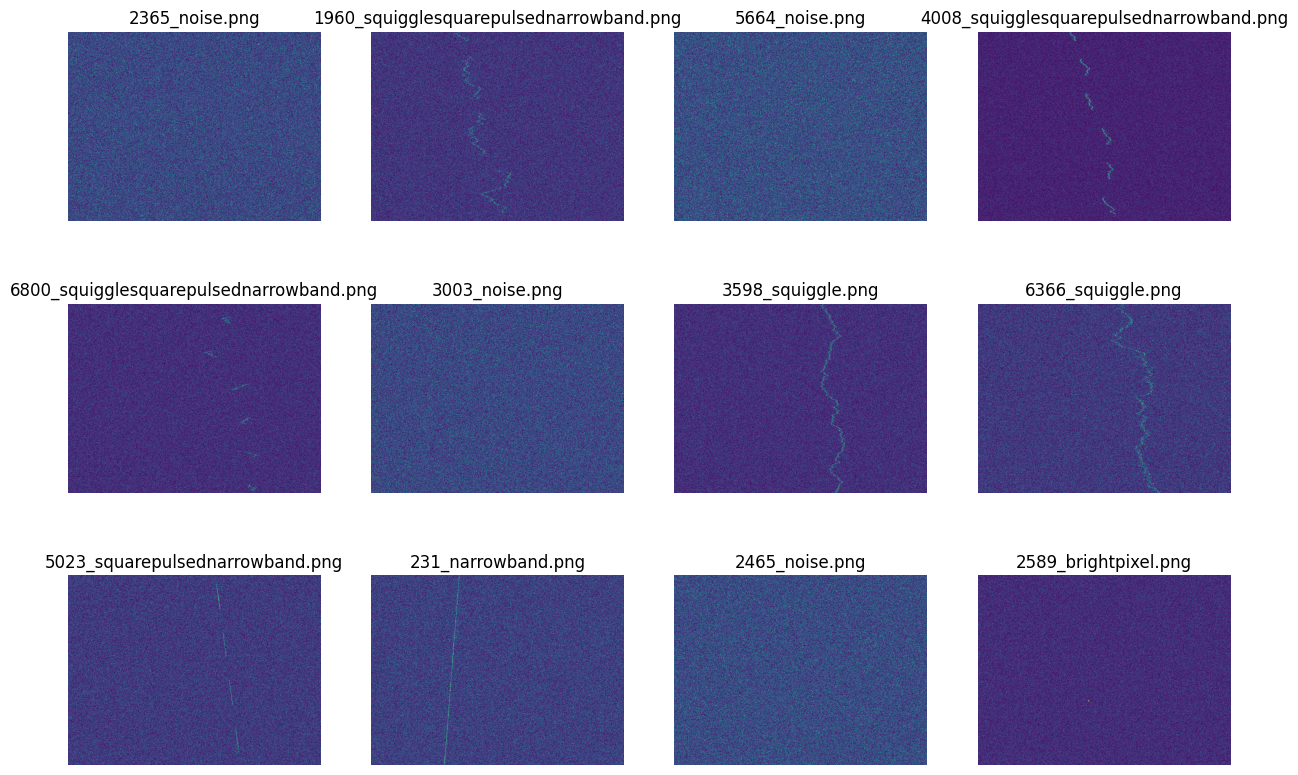

In [152]:
plot_random_images(image_paths, num_images=12)

**Inference:**
* brightpixels and noise class images seems to be similar but with a little bit of color differences, so our model might misinterprete one with the other
* based on external research we came to know that a narrowband like signals are the once that need additional investigation to check for extrateresstial intelligence signals